In [100]:
from keras import models
from keras import layers
from keras.utils import to_categorical, plot_model
import os
import shutil
import cv2
from keras.models import Sequential, Model
from keras import Input
import pydot
import keras as K
import keras
from keras import optimizers
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
base_dir_path = '/home/triet/Desktop/test_qopius/Implementation of Classification Model/data2'

In [3]:
products_dir = sorted([o for o in os.listdir(base_dir_path)])

In [4]:
data_split_folder = ['train', 'validation', 'test']
for f in data_split_folder:
    if os.path.exists(os.path.join(base_dir_path, f)):
        shutil.rmtree(os.path.join(base_dir_path, f))
    os.mkdir(os.path.join(base_dir_path, f))

In [5]:
data_split_folder_product = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
for f1 in data_split_folder:
    for f2 in data_split_folder_product:
        os.mkdir(os.path.join(base_dir_path, f1, f2))

In [6]:
for f1 in data_split_folder:
    for f3,f4 in (tuple(zip(products_dir, data_split_folder_product))):
        if f1 == 'train':
            idx1, idx2 = 0, 50
        elif f1 == 'validation':
            idx1, idx2 = 50, 60
        else:
            idx1, idx2 = 60, 90
        for file in os.listdir(os.path.join(base_dir_path, f3))[idx1:idx2]:
            src = os.path.join(base_dir_path, f3, file)
            dst = os.path.join(base_dir_path, f1, f4, file)
            shutil.copyfile(src, dst)

In [47]:
from keras.preprocessing.image import ImageDataGenerator

In [48]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [49]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir_path,data_split_folder[0]),
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

In [87]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir_path,data_split_folder[0]),
    target_size=(200, 200),
    batch_size=20,
    class_mode='categorical')

Found 300 images belonging to 6 classes.


In [88]:
validation_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir_path,data_split_folder[1]),
    target_size=(200, 200),
    batch_size=5,
    class_mode='categorical')

Found 60 images belonging to 6 classes.


In [89]:
test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir_path,data_split_folder[2]),
    target_size=(200, 200),
    batch_size=5,
    class_mode='categorical')

Found 180 images belonging to 6 classes.


In [13]:
#
#
#
#

In [90]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [91]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [92]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=15,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=12)

Epoch 1/20
15/15 [==============================] - 7s 493ms/step - loss: 0.4239 - acc: 0.8333 - val_loss: 0.3290 - val_acc: 0.8333
Epoch 2/20
15/15 [==============================] - 9s 598ms/step - loss: 0.3338 - acc: 0.8444 - val_loss: 0.3488 - val_acc: 0.8750
Epoch 3/20
15/15 [==============================] - 11s 703ms/step - loss: 0.2915 - acc: 0.8561 - val_loss: 0.1557 - val_acc: 0.9139
Epoch 4/20
15/15 [==============================] - 11s 702ms/step - loss: 0.2649 - acc: 0.8789 - val_loss: 0.2027 - val_acc: 0.9333
Epoch 5/20
15/15 [==============================] - 11s 701ms/step - loss: 0.2428 - acc: 0.8900 - val_loss: 0.0980 - val_acc: 0.9139
Epoch 6/20
15/15 [==============================] - 11s 703ms/step - loss: 0.2202 - acc: 0.9033 - val_loss: 0.0737 - val_acc: 0.9417
Epoch 7/20
15/15 [==============================] - 11s 703ms/step - loss: 0.2081 - acc: 0.9094 - val_loss: 0.2438 - val_acc: 0.9028
Epoch 8/20
15/15 [==============================] - 11s 726ms/step - lo

In [93]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=36)

In [94]:
print(test_loss, test_acc)

0.16788241267204285 0.9370371699333191


In [95]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [96]:
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
train_acc = history.history['acc']

epochs = range(len(val_loss))

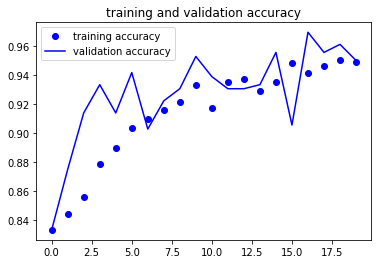

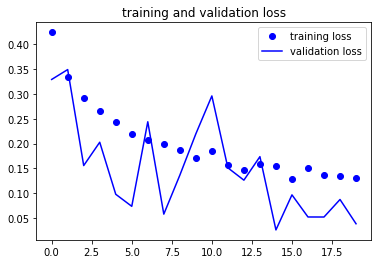

In [101]:
plt.plot(epochs, train_acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.legend()
plt.title('training and validation accuracy')

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.legend()
plt.title('training and validation loss')

plt.show()

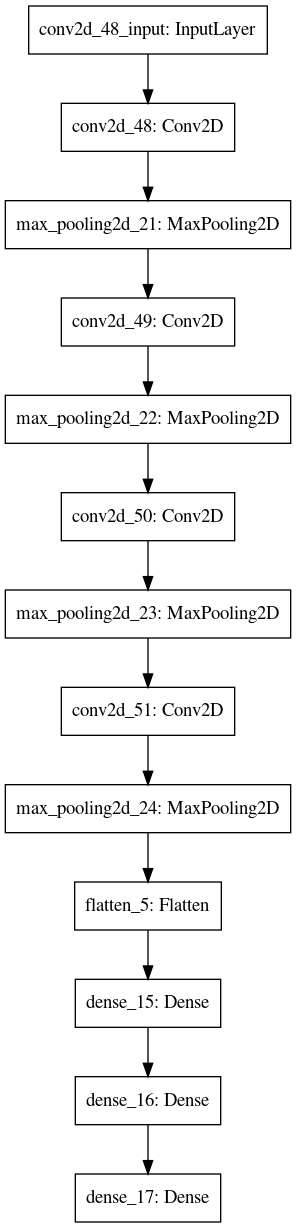

In [102]:
plot_model(model, to_file='model2.png') 